# Runs test example

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import importlib

import general_functions as gf
importlib.reload(gf)
gf.add_parent_dir_to_path()

from lib import class_general_functions as cgf
importlib.reload(cgf)

#.............................................
# PLOTTING COMMANDS
#.............................................
gf.cc()
plt.ioff()

In [2]:
def count_runs(x):
    Npos = 0
    Nneg = 0

    sgn = np.nan
    for val in x:
        if(np.sign(val)!=sgn):
            if(np.sign(val)>0):
                Npos+=1
            else:
                Nneg+=1
            sgn = np.sign(val)

    runs = Npos + Nneg        
    return runs

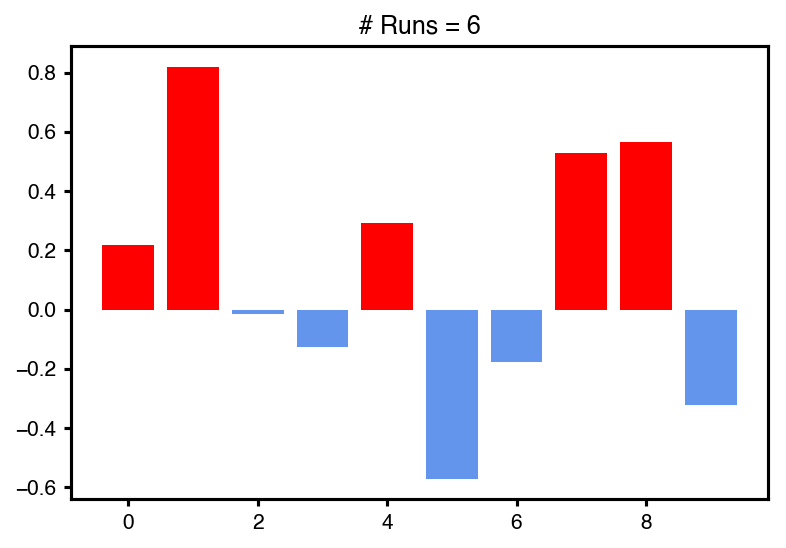

In [17]:
N = 10
x = np.random.uniform(-1.,1.,N)
for i,val in enumerate(x):
    if(val>0):
        plt.bar(i,val, color = 'red')
    else:
        plt.bar(i,val, color = 'cornflowerblue')

plt.title('# Runs = ' + str(count_runs(x)))        
plt.show()

In [4]:
N = 1000
y = np.random.uniform(-1.,1.,N)

runs = np.zeros((1000,))
for iloop in np.arange(0,1000):
        x = np.random.choice(y,len(y))
        runs[iloop] = count_runs(x)
        

In [8]:
Npos = len(np.where(x>0)[0])
Nneg = len(np.where(x<0)[0])
print(Npos,Nneg)

#Theory
N = Npos + Nneg
mu = 1 + (2*Npos*Nneg)/N
sigma = np.sqrt((mu-1)*(mu-2)/(N-1))
print(mu,sigma)

480 520
500.2 15.778161819121719


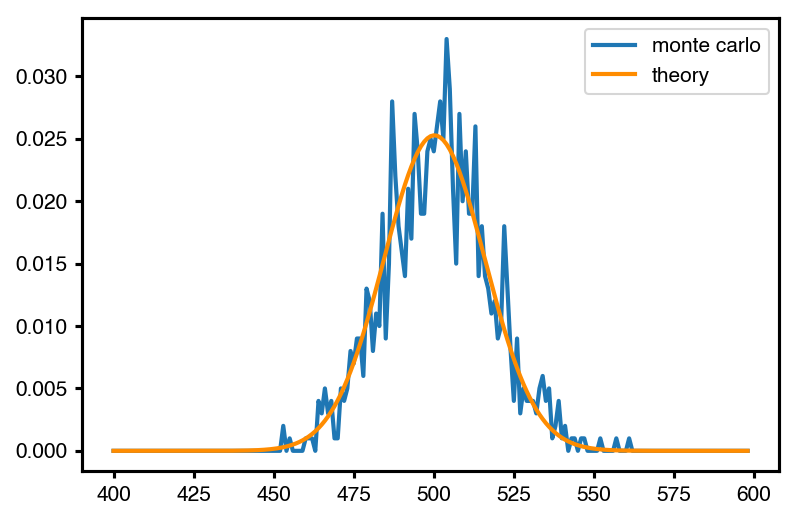

In [16]:
xbins = np.arange(400,600,1)
hx = np.histogram(runs,xbins)
plt.plot(xbins[:-1],hx[0]/len(runs), linewidth=2,label='monte carlo')
plt.plot(xbins[:-1],stats.norm.pdf(xbins[:-1],loc = mu, scale=sigma),'-',color='darkorange',linewidth=2,label='theory')
plt.legend()
plt.show()